<a href="https://colab.research.google.com/github/ArySuby/Proyecto_CoderDS_SUBY_Ary2daparte/blob/main/merluza_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# --- Setup inicial ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
from google.colab import files
uploaded = files.upload()

Saving merluzacomercialfiltr.xlsx to merluzacomercialfiltr (1).xlsx


In [6]:
df = pd.read_excel("merluzacomercialfiltr.xlsx", parse_dates=["fecha"])

In [7]:
df["sexo"] = df["sexo"].astype(str).str.strip()


In [8]:
print(df["sexo"].unique())

['2' '1']


In [12]:
print(df["largo_tot"].unique())

[16 19 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 54 55 52 53 56 58 59 60 61 63 64 65 70 76 79 80 17 18 24
 67 68 71 83 20 22 21 57 69 72 77 78 23 62 66 73 15 13 75 84 82 74 81 12
 14 11 87 85 88 91 89 92 86 10 95 90]


In [13]:
# --- Previsualizar ---
print("Primeras filas:")
print(df.head())
print(len(df))
print("\nColumnas disponibles:", df.columns.tolist())

Primeras filas:
       fecha    area  n_ejemp  largo_tot sexo  edad
0 2016-01-05  4160.0        1         16    2     1
1 2016-01-05  4160.0        2         19    1     1
2 2016-01-05  4160.0        3         25    1     1
3 2016-01-05  4160.0        4         26    1     1
4 2016-01-05  4160.0        5         27    1     2
168624

Columnas disponibles: ['fecha', 'area', 'n_ejemp', 'largo_tot', 'sexo', 'edad']


In [14]:
# --- Preprocesamiento ---
# Convertir fecha a datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors='coerce')

# Eliminar filas con valores faltantes en columnas relevantes
df = df.dropna(subset=["largo_tot", "sexo", "edad", "fecha", "area"])

In [15]:
# Variables predictoras y objetivo
X = df[["largo_tot", "sexo"]].copy()
y = df["edad"]

# Codificar sexo
X["sexo"] = X["sexo"].astype("category").cat.codes

In [16]:
# --- División de datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# --- Modelo Lineal ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# --- Modelo No Lineal (Random Forest) ---
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [18]:
# --- Evaluación ---
def evaluar_modelo(nombre, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{nombre} - RMSE:", rmse)
    print(f"{nombre} - R2:", r2)

evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)
evaluar_modelo("Random Forest", y_test, y_pred_rf)


Regresión Lineal - RMSE: 0.6971046919771161
Regresión Lineal - R2: 0.7364459620999573

Random Forest - RMSE: 0.6502649781969486
Random Forest - R2: 0.7706734213692874


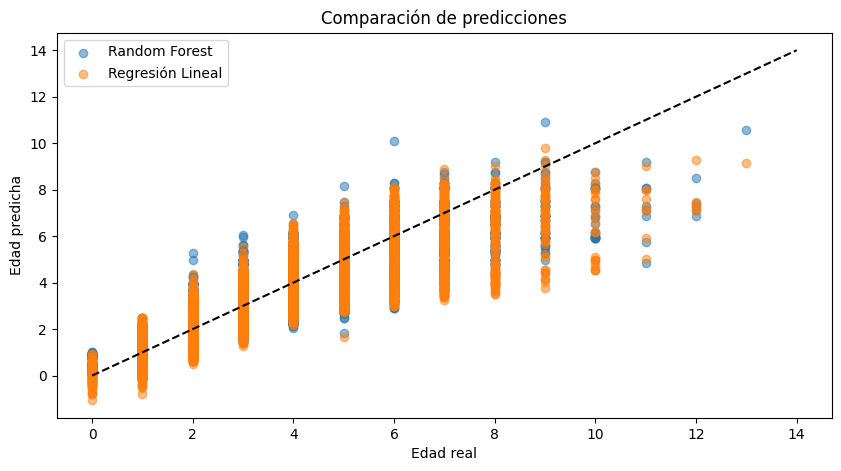

In [19]:
# --- Visualización ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest")
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Regresión Lineal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Edad real")
plt.ylabel("Edad predicha")
plt.legend()
plt.title("Comparación de predicciones")
plt.show()

<Axes: xlabel='largo_tot', ylabel='edad'>

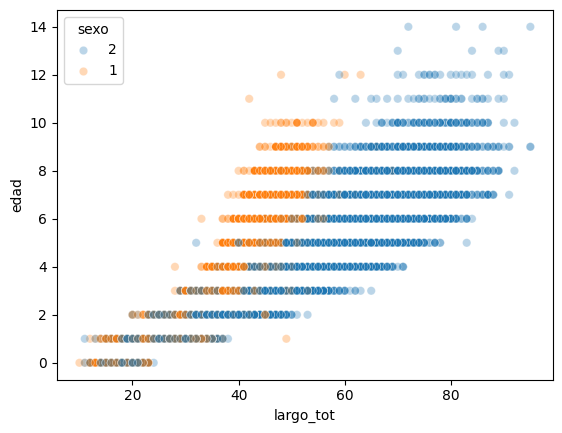

In [20]:
import seaborn as sns
sns.scatterplot(data=df, x="largo_tot", y="edad", hue="sexo", alpha=0.3)